In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
#Import basic libraries
import cv2
import math
import time
import random
import numpy as np
import pandas as pd
from copy import copy
import seaborn as sns
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

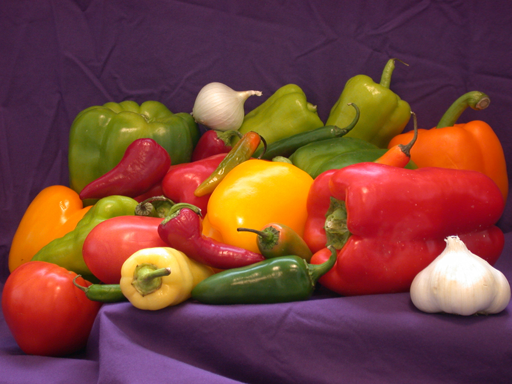

384 512


In [10]:
#load the test image
inputpath = "/content/drive/MyDrive/image_encryption_chaotic_mapping_new/test_images/pepper.png"
input_image = cv2.imread(inputpath)

height = int(input_image.shape[0]*100/100)
width = int(input_image.shape[1]*100/100)

dsize = (width,height)
new_input_image = cv2.resize(input_image,dsize)
cv2_imshow(new_input_image)
print(height,width)

red = new_input_image[:,:,2]
green = new_input_image[:,:,1]
blue = new_input_image[:,:,0]





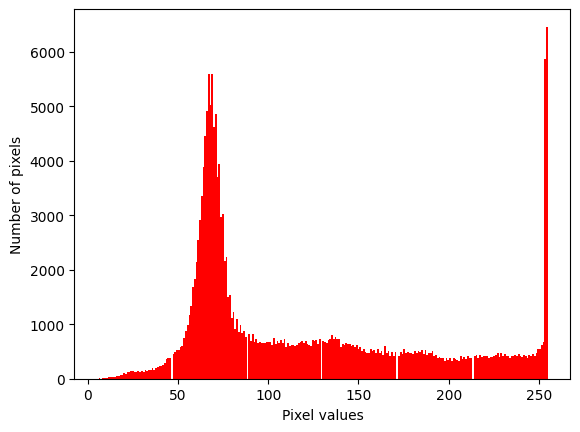

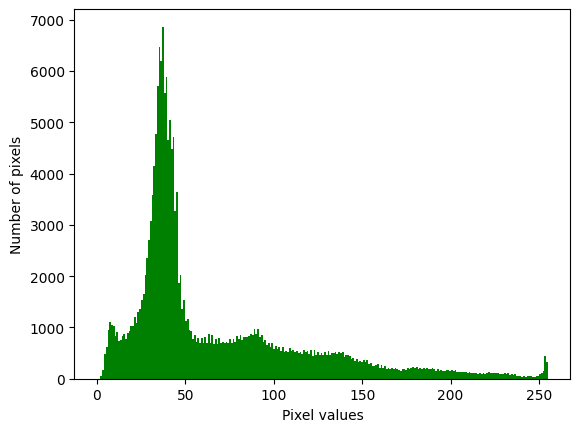

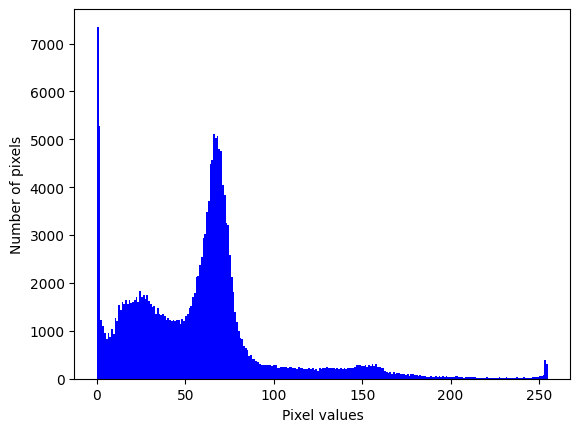

In [11]:
#Plot the histograms of the original image
#with pixel values on X axis

red_pixel = []
for i in range(0,height):
  for j in range(0,width):
    red_pixel.append(red[i][j])

blue_pixel = []
for i in range(0,height):
  for j in range(0,width):
    blue_pixel.append(blue[i][j])

green_pixel = []
for i in range(0,height):
  for j in range(0,width):
    green_pixel.append(green[i][j])


plt.xlabel('Pixel values')
plt.ylabel('Number of pixels')
plt.hist(red_pixel,bins=256, color = "red", lw=0)
plt.savefig('baboon_red_hist_original.eps', format='eps')
plt.show()
print("\n")


plt.xlabel('Pixel values')
plt.ylabel('Number of pixels')
plt.hist(green_pixel,bins=256, color = "green", lw=0)
plt.savefig('baboon_green_hist_original.eps', format='eps')
plt.show()
print("\n")


plt.xlabel('Pixel values')
plt.ylabel('Number of pixels')
plt.hist(blue_pixel,bins=256, color = "blue", lw=0)
plt.savefig('baboon_blue_hist_original.eps', format='eps')
plt.show()

key generation time of the program is 0.6936588287353516


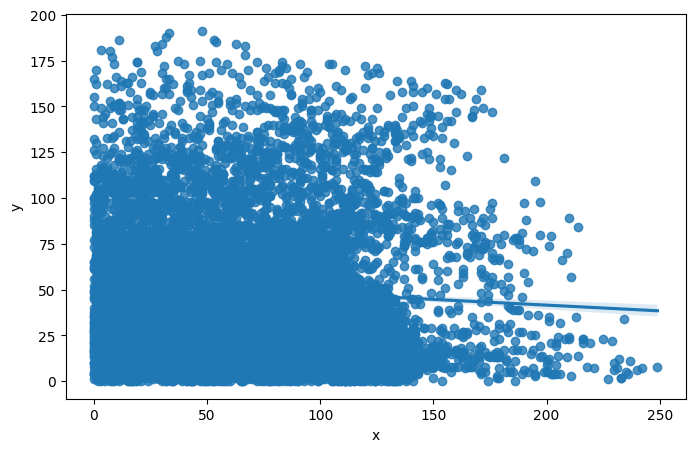

In [12]:
#Generate the chaotic array

start_key = time.time()
red = new_input_image[:,:,2]
green = new_input_image[:,:,1]
blue = new_input_image[:,:,0]
h,w = red.shape
dimension = h*w

######################## Generate chaotic array ##############################
################## Tinker bell ################
x_tinker=[0.1]
y_tinker=[0.3]
for i in range(0,dimension-1):
  next_x = (x_tinker[i]**2) - (y_tinker[i]**2) + 0.9*x_tinker[i] - 0.6013*y_tinker[i]
  next_y = 2*x_tinker[i]*y_tinker[i] + 2*x_tinker[i] + 0.5*y_tinker[i]
  x_tinker.append(next_x)
  y_tinker.append(next_y)


############### Duffing ########################
x_duff=[0.1]
y_duff=[0.3]
for i in range(0,dimension-1):
    next_x = y_duff[i]
    next_y = 2.75*y_duff[i] - 0.2*x_duff[i] - pow(y_duff[i],3)
    #next_x = next_x*100
    #next_y = next_y*100
    x_duff.append(next_x)
    y_duff.append(next_y)



########### Henon ###########################
x_henon=[0.1]
y_henon=[0.3]
for i in range(0,dimension-1):
  next_x = 1 - 1.4*x_henon[i]*x_henon[i] + y_henon[i]
  next_y = 0.3*x_henon[i]
  x_henon.append(next_x)
  y_henon.append(next_y)

#################### Combination of Tinkerbell and Henon map################

td_x_combination = []
td_y_combination = []
for i in range(0,dimension):

  td_x_combination.append(x_tinker[i] + x_henon[i])
  td_y_combination.append(y_tinker[i] + y_henon[i])


for i in range(0,dimension):
  td_x_combination[i]*=100
  td_y_combination[i]*=100
  if (td_x_combination[i]<0):
    td_x_combination[i] = -(td_x_combination[i])
  if (td_y_combination[i]<0):
    td_y_combination[i] = -(td_y_combination[i])
  td_x_combination[i] = int(td_x_combination[i])
  td_y_combination[i] = int(td_y_combination[i])

for i in range(0,dimension):
  if h<w:
    if td_x_combination[i]>=h:
      td_x_combination[i]%=h-1                    #divide by samller dimension

  elif h>w:
    if td_x_combination[i]>=w:
      td_x_combination[i]%=w-1

  elif h==w:
    if td_x_combination[i]>=h:
      td_x_combination[i]%=h-1                    #divide by samller dimension



for i in range(0,dimension):
  if h<w:
    if td_y_combination[i]>=h:
      td_y_combination[i]%=h-1

  elif h>w:
    if td_y_combination[i]>=w:
      td_y_combination[i]%=w-1

  elif h==w:
    if td_y_combination[i]>=w:
      td_y_combination[i]%=w-1

x = copy(td_x_combination)
y = copy(td_y_combination)

xor_array = []
for i in range(h*w):
  xor_array.append(x[i]*y[i])

for i in range(h*w):
  xor_array[i]%=256

end_key = time.time()
print(f"key generation time of the program is {end_key - start_key}")

# Create a Pandas DataFrame to link x and y values
df = pd.DataFrame({
    'x': x[:10000],
    'y': y[:10000]
})

f,ax = plt.subplots(figsize = (8,5))
# Use the DataFrame for regplot
sns.regplot(x='x', y='y', data=df)  # Changed line
plt.savefig("TDmap.eps")
plt.show()

In [13]:
#function for conducting the NCPR and UACI test
def ncpr_uaci(combined_scrambling):
  encrypted_red = combined_scrambling[:,:,2]
  encrypted_green = combined_scrambling[:,:,1]
  encrypted_blue = combined_scrambling[:,:,0]

  lena = cv2.imread(inputpath)
  changed_red = lena[:,:,2]
  changed_green = lena[:,:,1]
  changed_blue = lena[:,:,0]

  changed_red[12][90] = 123
  changed_green[12][90] = 56
  changed_blue[12][90] = 224

  h,w =encrypted_red.shape

  D_red = np.random.randint(1,size=(h,w))
  D_green = np.random.randint(1,size=(h,w))
  D_blue = np.random.randint(1,size=(h,w))

  print(h,w)

  for i in range(0,h):
    for j in range(0,w):
      if encrypted_red[i][j] == changed_red[i][j]:
        D_red[i][j] = 0
      else:
        D_red[i][j] = 1

  for i in range(0,h):
    for j in range(0,w):
      if encrypted_green[i][j] == changed_green[i][j]:
        D_green[i][j] = 0
      else:
        D_green[i][j] = 1

  for i in range(0,h):
    for j in range(0,w):
      if encrypted_blue[i][j] == changed_blue[i][j]:
        D_blue[i][j] = 0
      else:
        D_blue[i][j] = 1

  npcr_red = np.sum(D_red)
  npcr_green = np.sum(D_green)
  npcr_blue = np.sum(D_blue)



  npcr_red = (npcr_red/(h*w))*100
  npcr_green = (npcr_green/(h*w))*100
  npcr_blue = (npcr_blue/(h*w))*100

  uaci_red = 0
  uaci_green = 0
  uaci_blue = 0
  for i in range(0,h):
    for j in range(0,w):
      uaci_red += abs(encrypted_red[i][j] - changed_red[i][j])
      uaci_green += abs(encrypted_green[i][j] - changed_green[i][j])
      uaci_blue += abs(encrypted_blue[i][j] - changed_blue[i][j])

  uaci_red = (uaci_red/(h*w*255))*100
  uaci_green = (uaci_green/(h*w*255))*100
  uaci_blue = (uaci_blue/(h*w*255))*100

  print("NPCR values:")
  print("Red channel: ",npcr_red)
  print("Green channel: ",npcr_green)
  print("Blue channel: ",npcr_blue)

  print("\n")
  print("UACI values:")
  print("Red channel: ",uaci_red)
  print("Green channel: ",uaci_green)
  print("Blue channel: ",uaci_blue)

########################## Encryption begins ######################################

#Function for chaotic scrambling
def chaotic_scrambling(new_input_image):
  start_chaotic_scrambling = time.time()

  #RED CHANNEL
  count1 = 0
  for i in range(0,h):
    for j in range(0,w):
      red[i][j] = red[i][j]^xor_array[count1]
      count1+=1


  #GREEN CHANNEL
  count3 = 0
  for i in range(0,h):
    for j in range(0,w):
      green[i][j] = green[i][j]^xor_array[count3]
      count3+=1


  #BLUE CHANNEL
  count5 = 0
  for i in range(0,h):
    for j in range(0,w):
      blue[i][j] = blue[i][j]^xor_array[count5]
      count5+=1

  chaotic_xor_image = cv2.merge((blue,green,red))
  print("Image after xor operation")
  cv2_imshow(chaotic_xor_image)
  cv2.imwrite('b.png', chaotic_xor_image)
  im = Image.open('b.png')
  im.save('b.eps', lossless = True)

  end_chaotic_scrambling = time.time()
  print(f"Encryption time of the program is {end_chaotic_scrambling - start_chaotic_scrambling}")
  chaotic_swapping(red,green,blue,x,y)

  ################################# Chaotic scrambling ends ######################


#function for chaotic swaping
def chaotic_swapping(red,green,blue,x,y):

  start_chaotic_swapping = time.time()
  count = 0
  for i in range(0,h):
    for j in range(0,w):
      temp = red[i][j]
      red[i][j] = red[x[count]][y[count]]
      red[x[count]][y[count]] = temp
      count+=1

  count = 0
  for i in range(0,h):
    for j in range(0,w):
      temp = green[i][j]
      green[i][j] = green[x[count]][y[count]]
      green[x[count]][y[count]] = temp
      count+=1

  count = 0
  for i in range(0,h):
    for j in range(0,w):
      temp = blue[i][j]
      blue[i][j] = blue[x[count]][y[count]]
      blue[x[count]][y[count]] = temp
      count+=1


  image_to_zigzag = cv2.merge((blue,green,red))
  print("\nEncryption using chaotic map:")
  cv2_imshow(image_to_zigzag)
  cv2.imwrite('c.png', image_to_zigzag)
  im = Image.open('c.png')
  im.save('c.eps', lossless = True)

  end_chaotic_swapping = time.time()
  print(f"Encryption time of the program is {end_chaotic_swapping - start_chaotic_swapping}")
  zigzag_scrambling(image_to_zigzag)


  ################################# Chaotic swapping ends ######################


# Functions for zigzag scrambling
def zigzag_scrambling(image_to_zigzag):
  start_zigzag = time.time()
  value = h+w-1
  overall_count = 0
  solution_array = [[],[],[]]

#for images whose height = width
  if h==w:
    while overall_count!=3:
      diag = 0
      i=0
      j=0
      flag = 0
      if overall_count == 0:
        channel = copy(red)
      elif overall_count == 1:
        channel = copy(green)
      elif overall_count == 2:
        channel = copy(blue)

      solution_array[overall_count].append(channel[i][j])
      while diag!=value-1:

        if i==0  and j!=w-1:
          j+=1
          solution_array[overall_count].append(channel[i][j])
          if i==0  and j==w-1:
            while i!=h-1:
              i+=1
              j-=1
              solution_array[overall_count].append(channel[i][j])
            flag = 1
          while j!=0 and flag ==0:
            i+=1
            j-=1
            solution_array[overall_count].append(channel[i][j])
          diag+=1



        if i!=0 and i!=h-1 and j==0:
          i+=1
          solution_array[overall_count].append(channel[i][j])
          while i!=0:
            i-=1
            j+=1
            solution_array[overall_count].append(channel[i][j])
          diag+=1


        if i!=0 and j==w-1:
          i+=1
          if i==h-1 and j==w-1:
            solution_array[overall_count].append(channel[i][j])
            break                                                   #update
          else:
            temp = i
            solution_array[overall_count].append(channel[i][j])
            while j!=temp:
              i+=1
              j-=1
              solution_array[overall_count].append(channel[i][j])
            diag+=1

        if i!=0 and i==h-1 and j==0:
          j+=1
          temp = j
          solution_array[overall_count].append(channel[i][j])
          while i!=temp:
            i-=1
            j+=1
            solution_array[overall_count].append(channel[i][j])
          diag+=1



        if i==h-1 and j!=0:
          j+=1
          solution_array[overall_count].append(channel[i][j])
          if i==h-1 and j==w-1:
            break

          else:
            while j!=w-1:
              j+=1
              i-=1
              solution_array[overall_count].append(channel[i][j])
              diag+=1

        if i==h-1 and j==0:
          j+=1
          solution_array[overall_count].append(channel[i][j])
          while j!=w-1:
            j+=1
            i-=1
            solution_array[overall_count].append(channel[i][j])
          diag+=1


        if i==0 and j==w-1:                                                    #update.
          i+=1
          solution_array[overall_count].append(channel[i][j])
          while i!=h-1:
            i+=1
            j-=1
            solution_array[overall_count].append(channel[i][j])
          diag+=1
      #print(red_solution_array)
      #print(solution_array[overall_count])
      #print(len(solution_array[overall_count]))
      overall_count+=1

#for images whose height > width
  if h>w:
    while overall_count!=3:
      diag = 0
      i=0
      j=0
      flag = 0
      odd_flag=0
      even_flag=0
      left_flag=0
      if overall_count == 0:
        channel = copy(red)
      elif overall_count == 1:
        channel = copy(green)
      elif overall_count == 2:
        channel = copy(blue)

      solution_array[overall_count].append(channel[i][j])
      while diag!=value-1:
        if i==0 and j!=w-1:
          j+=1
          solution_array[overall_count].append(channel[i][j])
          if i==0 and j==w-1 and w%2==0:
            even_flag = 1
            while i!= w-1:
              i+=1
              j-=1
              solution_array[overall_count].append(channel[i][j])
          while (j!=0 and even_flag==0) or (j!=0 and odd_flag==0):
            i+=1
            j-=1
            solution_array[overall_count].append(channel[i][j])
          diag+=1

        if i!=0 and i!= h-1 and j==0:
          i+=1
          #print(i,j)
          solution_array[overall_count].append(channel[i][j])
          if i==h-1 and even_flag ==1:
            left_flag=1
            #j+=1
            #solution_array[overall_count].append(channel[i][j])
            while j!=w-1:
              j+=1
              i-=1
              solution_array[overall_count].append(channel[i][j])
            diag+=1

          elif i==h-1 and odd_flag==1:
            left_flag=1
            while j!=w-1:
              i-=1
              j+=1
              solution_array[overall_count].append(channel[i][j])
            diag+=1

          elif even_flag==1 or odd_flag==1:
            while j!=w-1:
              i-=1
              j+=1
              solution_array[overall_count].append(channel[i][j])
            diag+=1

          else:
            temp = copy(i)
            while j!=temp:
              i-=1
              j+=1
              solution_array[overall_count].append(channel[i][j])
            diag+=1


        if i!=0 and j==w-1:
          i+=1
          solution_array[overall_count].append(channel[i][j])
          if i==h-1 and j==w-1:

            break
          elif left_flag==1:
            while i!=h-1:
              i+=1
              j-=1
              solution_array[overall_count].append(channel[i][j])
            diag+=1
          else:
            while j!=0:           #doubtful
              i+=1
              j-=1
              #print(i,j)
              solution_array[overall_count].append(channel[i][j])
            diag+=1

        if i==h-1 and j!=w-1:
          if i==h-1 and j==0:
            left_flag=1
          j+=1
          solution_array[overall_count].append(channel[i][j])
          if i==h-1 and j==w-1:
            break
          else:
            while j!=w-1:
              i-=1
              j+=1
              solution_array[overall_count].append(channel[i][j])
            diag+=1

        if i==0 and j==w-1 and (w%2)!=0:
          #print("h")
          i+=1
          solution_array[overall_count].append(channel[i][j])
          odd_flag=1
          while j!=0:
            j-=1
            i+=1
            solution_array[overall_count].append(channel[i][j])
          diag+=1
      #print(solution_array[overall_count])
      #print(len(solution_array[overall_count]))
      overall_count+=1

#for images whose height < width
  if h<w:
    while overall_count!=3:
      diag = 0
      i=0
      j=0
      flag = 0
      odd_flag=0
      even_flag=0
      right_diag=0
      if overall_count == 0:
        channel = copy(red)
      elif overall_count == 1:
        channel = copy(green)
      elif overall_count == 2:
        channel = copy(blue)
      solution_array[overall_count].append(channel[i][j])

      while diag!=value-1:
        if i==0 and j!=w-1:
          j+=1
          solution_array[overall_count].append(channel[i][j])
          if j==h-1:
            while i!=h-1:
              i+=1
              j-=1
              solution_array[overall_count].append(channel[i][j])
            even_flag=1
            diag+=1

          elif j==w-1:
            if even_flag == 1 and w%2==0:
              #i+=1
              #solution_array[overall_count].append(channel[i][j])
              while i!=h-1:
                i+=1
                j-=1
                solution_array[overall_count].append(channel[i][j])
              diag+=1
              right_diag = 1


            elif odd_flag==1 and w%2==0:
              while i!=h-1:
                i+=1
                j-=1
                solution_array[overall_count].append(channel[i][j])
              diag+=1
              right_diag=1
            elif odd_flag==1 and w%2!=0:
              i+=1
              while i!=h-1:
                i+=1
                j-=1
                solution_array[overall_count].append(channel[i][j])
              diag+=1
              right_diag = 1


          elif even_flag==0 and odd_flag==0:
            while j!=0:
              j-=1
              i+=1
              solution_array[overall_count].append(channel[i][j])
            diag+=1

          elif even_flag==1 or odd_flag==1:
            while  i!=h-1:
              i+=1
              j-=1
              solution_array[overall_count].append(channel[i][j])
            diag+=1


        if i!=0 and i!=h-1 and j==0:
          i+=1
          solution_array[overall_count].append(channel[i][j])
          if i==h-1:
            temp=copy(i)
            odd_flag=1
            while j!=temp:
              j+=1
              i-=1
              solution_array[overall_count].append(channel[i][j])
            diag+=1
          else:
            temp=copy(i)
            while j!=temp:
              j+=1
              i-=1
              solution_array[overall_count].append(channel[i][j])
            diag+=1

        if i==0 and j==w-1:
          right_diag+=1
          i+=1
          solution_array[overall_count].append(channel[i][j])
          while i!=h-1:
            i-=1
            j+=1
            solution_array[overall_count].append(channel[i][j])
          diag+=1



        if i==h-1 and j!=w-1:
          j+=1
          solution_array[overall_count].append(channel[i][j])
          if j==w-1:
            break
          elif right_diag==0:
            while i!=0:
              i-=1
              j+=1
              solution_array[overall_count].append(channel[i][j])
            diag+=1
            if j==w-1:
              right_diag=1
          elif right_diag==1:
            while j!=w-1:
              j+=1
              i-=1
              solution_array[overall_count].append(channel[i][j])
            diag+=1



        if i!=0 and i!=h-1 and j==w-1:
          i+=1
          solution_array[overall_count].append(channel[i][j])
          if i==h-1 and j==w-1:
            #solution_array[overall_count].append(channel[i][j])
            break
          else:
            while i!=h-1:
              i+=1
              j-=1
              solution_array[overall_count].append(channel[i][j])
            diag+=1


      #print(solution_array[overall_count])
      #print(len(solution_array[overall_count]))
      overall_count+=1

###########################zigzag matrix formation #############################
  encrypted_red = []
  encrypted_green = []
  encrypted_blue = []
  for i in range(0,h):
    row = []
    for j in range(0,w):
      row.append(0)
    encrypted_red.append(row)
    encrypted_green.append(row)
    encrypted_blue.append(row)

  encrypted_red = np.array(encrypted_red)
  encrypted_green = np.array(encrypted_green)
  encrypted_blue = np.array(encrypted_blue)


  c = 0
  while c!=3:
    if c== 0:
      red_count = 0
      for i in range(0,h):
        for j in range(0,w):
          encrypted_red[i][j] = solution_array[c][red_count]
          red_count+=1

    elif c==1:
      green_count = 0
      for i in range(0,h):
        for j in range(0,w):
          encrypted_green[i][j] = solution_array[c][green_count]
          green_count+=1

    elif c==2:
      blue_count = 0
      for i in range(0,h):
        for j in range(0,w):
          encrypted_blue[i][j] = solution_array[c][blue_count]
          blue_count+=1

    c+=1

######################## Encryption ends #######################################

###################### Analysis of proposed scheme #############################

######################## Histogram analysis ####################################
  red_pixel = []
  for i in range(0,height):
    for j in range(0,width):
      red_pixel.append(encrypted_red[i][j])

  blue_pixel = []
  for i in range(0,height):
    for j in range(0,width):
      blue_pixel.append(encrypted_blue[i][j])

  green_pixel = []
  for i in range(0,height):
    for j in range(0,width):
      green_pixel.append(encrypted_green[i][j])


  plt.xlabel('Pixel values')
  plt.ylabel('Number of pixels')
  plt.hist(red_pixel,bins=256, color = "red", lw=0)
  plt.savefig('baboon_red_hist_encrypted.eps', format='eps')
  plt.show()
  print("\n")


  plt.xlabel('Pixel values')
  plt.ylabel('Number of pixels')
  plt.hist(green_pixel,bins=256, color = "green", lw=0)
  plt.savefig('baboon_green_hist_encrypted.eps', format='eps')
  plt.show()
  print("\n")


  plt.xlabel('Pixel values')
  plt.ylabel('Number of pixels')
  plt.hist(blue_pixel,bins=256, color = "blue", lw=0)
  plt.savefig('baboon_blue_hist_encrypted.eps', format='eps')
  plt.show()
  print("\n")

  ################# MSE analysis #########################
  difference_squared_red = []
  for i in range(0,h):
    for j in range(0,w):
      number = (red[i][j] - encrypted_red[i][j])**2
      difference_squared_red.append(number)
  difference_sum_red = sum(difference_squared_red)

  difference_squared_green = []
  for i in range(0,h):
    for j in range(0,w):
      number = (green[i][j] - encrypted_green[i][j])**2
      difference_squared_green.append(number)
  difference_sum_green = sum(difference_squared_green)

  difference_squared_blue = []
  for i in range(0,h):
    for j in range(0,w):
      number = (blue[i][j] - encrypted_blue[i][j])**2
      difference_squared_blue.append(number)
  difference_sum_blue = sum(difference_squared_blue)

  mse_red = difference_sum_red/(h*w)
  mse_green = difference_sum_green/(h*w)
  mse_blue = difference_sum_blue/(h*w)

  psnr_red = 10*math.log10((255**2)/mse_red)
  psnr_green = 10*math.log10((255**2)/mse_green)
  psnr_blue = 10*math.log10((255**2)/mse_blue)

  print("Mean squared error red channel: ",mse_red)
  print("Mean squared error green channel: ",mse_green)
  print("Mean squared error blue channel: ",mse_blue)

  print("PSNR red channel: ",psnr_red)
  print("PSNR green channel: ",psnr_green)
  print("PSNR blue channel: ",psnr_blue)

############################### Data Loss attack ###############################
  '''for i in range(0,50):
    for j in range(0,50):
      encrypted_red[i][j] = 0
      encrypted_green[i][j] = 0
      encrypted_blue[i][j] = 0'''

############################# Noise attack #####################################
  '''noise_array_1=[]
  noise_array_2=[]
  noise_array_3=[]
  noise_array_4=[]
  for i in range(0,3277):
      noise_array_1.append(random.randint(0,255))
      noise_array_2.append(random.randint(0,255))
  for i in range(0,3277):
      noise_array_3.append(random.randint(0,255))
      noise_array_4.append(random.randint(0,255))

  valid_height, valid_width, _ = image_to_zigzag.shape
  for i in range(0, 3277):
        # Ensure indices are within bounds
        row_index = noise_array_1[i] % valid_height
        col_index = noise_array_2[i] % valid_width

        encrypted_red[row_index][col_index] = 0
        encrypted_green[row_index][col_index] = 0
        encrypted_blue[row_index][col_index] = 0

  noise_array_3 = np.random.randint(0, h, size=3277)
  noise_array_4 = np.random.randint(0, w, size=3277)

  for i in range(0,3277):
      encrypted_red[noise_array_3[i]][noise_array_4[i]] = 255
      encrypted_green[noise_array_3[i]][noise_array_4[i]] = 255
      encrypted_blue[noise_array_3[i]][noise_array_4[i]] = 255
'''
  ##################### entropy analysis ##################
  '''count_array_red = []
  count_array_green = []
  count_array_blue = []
  red_pixel_list = []
  green_pixel_list = []
  blue_pixel_list = []
  for i in range(0,h*w):
    count_array_red.append(0)
    count_array_green.append(0)
    count_array_blue.append(0)
  for i in range(0,h):
    for j in range(0,w):
      red_pixel_list.append(encrypted_red[i][j])
      green_pixel_list.append(encrypted_green[i][j])
      blue_pixel_list.append(encrypted_blue[i][j])

  for i in range(h*w):
    count_array_red[red_pixel_list[i]]+=1
    count_array_green[green_pixel_list[i]]+=1
    count_array_blue[blue_pixel_list[i]]+=1

  red_sum = sum(count_array_red)
  green_sum = sum(count_array_green)
  blue_sum = sum(count_array_blue)

  red_prob_array = []
  green_prob_array = []
  blue_prob_array = []
  for i in range(0,h*w):
    red_prob_array.append(count_array_red[i]/red_sum)
    green_prob_array.append(count_array_green[i]/green_sum)
    blue_prob_array.append(count_array_blue[i]/blue_sum)

  red_entropy_array = []
  green_entropy_array = []
  blue_entropy_array = []
  for i in range(0,h*w):
    if red_prob_array[i] == 0:
      r_entropy = 0
    else:
      r_entropy = red_prob_array[i]*math.log2(1/red_prob_array[i])
    if green_prob_array[i] == 0:
      g_entropy = 0
    else:
      g_entropy = green_prob_array[i]*math.log2(1/green_prob_array[i])
    if blue_prob_array[i] == 0:
      b_entropy = 0
    else:
      b_entropy = blue_prob_array[i]*math.log2(1/blue_prob_array[i])

    red_entropy_array.append(r_entropy)
    green_entropy_array.append(g_entropy)
    blue_entropy_array.append(b_entropy)

  red_entropy = sum(red_entropy_array)
  green_entropy = sum(green_entropy_array)
  blue_entropy = sum(blue_entropy_array)

  print("Red entropy: ",red_entropy)
  print("Green_entropy: ",green_entropy)
  print("Blue entropy: ",blue_entropy)'''


  ############# Function call ############################

  combined_scrambling = cv2.merge((encrypted_blue,encrypted_green,encrypted_red))
  end_zigzag = time.time()
  print(f"Encryption time of the program is {end_zigzag - start_zigzag}")

  cv2.imwrite('d.png', combined_scrambling)
  im = Image.open('d.png')
  im.save('d.eps', lossless = True)
  ncpr_uaci(combined_scrambling)
  print("\nEncrypted image")
  cv2_imshow(combined_scrambling)
  #print("\nEncryption time:",time.perf_counter())
  zigzag_descrambling(combined_scrambling)








In [14]:
############################## Decryption  begins #######################

#function for zigzag descrambling
def zigzag_descrambling(combined_scrambling):


  start_zigzag_dec = time.time()
  received_blue,received_green,received_red = cv2.split(combined_scrambling)

  red_traversal_array = []
  for i in range(0,h):
    for j in range(0,w):
      red_traversal_array.append(received_red[i][j])

  green_traversal_array = []
  for i in range(0,h):
    for j in range(0,w):
      green_traversal_array.append(received_green[i][j])

  blue_traversal_array = []
  for i in range(0,h):
    for j in range(0,w):
      blue_traversal_array.append(received_blue[i][j])

  matrix = []
  for i in range(0,h):
    row=[]
    for j in range(0,w):
      row.append(0)
    matrix.append(row)

  zero_array = np.array(matrix)



  overall_count = 0
  value = h+w-1

  #for images whose height = width
  if h==w:
    while overall_count !=3:
      diag = 0
      i=0
      j=0
      flag = 0
      count = 0
      if overall_count == 0:
        traversal_array = red_traversal_array
        decrypted_array = copy(zero_array)
        decrypted_array[i][j] = traversal_array[count]

      if overall_count == 1:
        traversal_array = green_traversal_array
        decrypted_array = copy(zero_array)
        decrypted_array[i][j] = traversal_array[count]

      if overall_count == 2:
        traversal_array = blue_traversal_array
        decrypted_array = copy(zero_array)
        decrypted_array[i][j] = traversal_array[count]




      count+=1
      while diag!=value-1:

        if i==0  and j!=w-1:
          j+=1
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          if i==0  and j==w-1:
            while i!=h-1:
              i+=1
              j-=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            flag = 1
          while j!=0 and flag ==0:
            i+=1
            j-=1
            decrypted_array[i][j] = traversal_array[count]
            count+=1
          diag+=1



        if i!=0 and i!=h-1 and j==0:
          i+=1
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          while i!=0:
            i-=1
            j+=1
            decrypted_array[i][j] = traversal_array[count]
            count+=1
          diag+=1


        if i!=0 and j==w-1:
          i+=1
          temp = i
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          while j!=temp:
            i+=1
            j-=1
            decrypted_array[i][j] = traversal_array[count]
            count+=1
          diag+=1

        if i!=0 and i==h-1 and j==0:
          j+=1
          temp = j
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          while i!=temp:
            i-=1
            j+=1
            decrypted_array[i][j] = traversal_array[count]
            count+=1
          diag+=1



        if i==h-1 and j!=0:
          j+=1
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          if i==h-1 and j==w-1:
            break

          else:
            while j!=w-1:
              j+=1
              i-=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
              diag+=1

        if i==h-1 and j==0:
          j+=1
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          while j!=w-1:
            j+=1
            i-=1
            decrypted_array[i][j] = traversal_array[count]
            count+=1
          diag+=1

      if overall_count == 0:
        red_decrypted_array = copy(decrypted_array)

      elif overall_count == 1:
        green_decrypted_array = copy(decrypted_array)

      elif overall_count == 2:
        blue_decrypted_array = copy(decrypted_array)


      overall_count+=1

#for images whose height > width
  elif h>w:
    while overall_count!=3:
      diag = 0
      i=0
      j=0
      flag = 0
      odd_flag=0
      even_flag=0
      left_flag=0
      count = 0

      if overall_count == 0:
        traversal_array = red_traversal_array
        decrypted_array = copy(zero_array)
        decrypted_array[i][j] = traversal_array[count]

      if overall_count == 1:
        traversal_array = green_traversal_array
        decrypted_array = copy(zero_array)
        decrypted_array[i][j] = traversal_array[count]

      if overall_count == 2:
        traversal_array = blue_traversal_array
        decrypted_array = copy(zero_array)
        decrypted_array[i][j] = traversal_array[count]


      count+=1

      while diag!=value-1:
        if i==0 and j!=w-1:
          j+=1
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          if i==0 and j==w-1 and w%2==0:
            even_flag = 1
            while i!= w-1:
              i+=1
              j-=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
          while (j!=0 and even_flag==0) or (j!=0 and odd_flag==0):
            i+=1
            j-=1
            decrypted_array[i][j] = traversal_array[count]
            count+=1
          diag+=1

        if i!=0 and i!= h-1 and j==0:
          i+=1
          #print(i,j)
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          if i==h-1 and even_flag ==1:
            left_flag=1
            #j+=1
            #solution_array[overall_count].append(channel[i][j])
            while j!=w-1:
              j+=1
              i-=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            diag+=1

          elif i==h-1 and odd_flag==1:
            print("h")
            left_flag=1
            while j!=w-1:
              i-=1
              j+=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            diag+=1

          elif even_flag==1 or odd_flag==1:
            while j!=w-1:
              i-=1
              j+=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            diag+=1

          else:
            temp = copy(i)
            while j!=temp:
              i-=1
              j+=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            diag+=1


        if i!=0 and j==w-1:
          i+=1
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          if i==h-1 and j==w-1:
            diag+=1
            break
          elif left_flag==1:
            while i!=h-1:
              i+=1
              j-=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            diag+=1
          else:
            while j!=0:           #doubtful
              i+=1
              j-=1
              #print(i,j)
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            diag+=1

        if i==h-1 and j!=w-1:
          if i==h-1 and j==0:
            left_flag=1
          j+=1
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          if i==h-1 and j==w-1:
            break
          else:
            while j!=w-1:
              i-=1
              j+=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            diag+=1

        if i==0 and j==w-1 and (w%2)!=0:
          #print("h")
          i+=1
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          odd_flag=1
          while j!=0:
            j-=1
            i+=1
            decrypted_array[i][j] = traversal_array[count]
            count+=1
          diag+=1


      if overall_count == 0:
        red_decrypted_array = copy(decrypted_array)

      elif overall_count == 1:
        green_decrypted_array = copy(decrypted_array)

      elif overall_count == 2:
        blue_decrypted_array = copy(decrypted_array)
      overall_count+=1

#for images whose height < width
  elif h<w:
    while overall_count!=3:
      diag = 0
      i=0
      j=0
      flag = 0
      odd_flag=0
      even_flag=0
      right_diag=0
      count = 0

      if overall_count == 0:
        traversal_array = red_traversal_array
        decrypted_array = copy(zero_array)
        decrypted_array[i][j] = traversal_array[count]

      if overall_count == 1:
        traversal_array = green_traversal_array
        decrypted_array = copy(zero_array)
        decrypted_array[i][j] = traversal_array[count]

      if overall_count == 2:
        traversal_array = blue_traversal_array
        decrypted_array = copy(zero_array)
        decrypted_array[i][j] = traversal_array[count]


      count+=1
      while diag!=value-1:
        if i==0 and j!=w-1:
          j+=1
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          if j==h-1:
            while i!=h-1:
              i+=1
              j-=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            even_flag=1
            diag+=1

          elif j==w-1:
            if even_flag == 1 and w%2==0:
              while i!=h-1:
                i+=1
                j-=1
                decrypted_array[i][j] = traversal_array[count]
                count+=1
              diag+=1
              right_diag = 1

            elif odd_flag==1 and w%2==0:
              while i!=h-1:
                i+=1
                j-=1
                decrypted_array[i][j] = traversal_array[count]
                count+=1
              diag+=1
              right_diag=1
            elif odd_flag==1 and w%2!=0:
              i+=1
              while i!=h-1:
                i+=1
                j-=1
                decrypted_array[i][j] = traversal_array[count]
                count+=1
              diag+=1
              right_diag = 1


          elif even_flag==0 and odd_flag==0:
            while j!=0:
              j-=1
              i+=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            diag+=1

          elif even_flag==1 or odd_flag==1:
            while  i!=h-1:
              i+=1
              j-=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            diag+=1


        if i!=0 and i!=h-1 and j==0:
          i+=1
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          if i==h-1:
            temp=copy(i)
            odd_flag=1
            while j!=temp:
              j+=1
              i-=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            diag+=1
          else:
            temp=copy(i)
            while j!=temp:
              j+=1
              i-=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            diag+=1

        if i==0 and j==w-1:
          #right_diag+=1
          i+=1
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          while i!=h-1:
            i-=1
            j+=1
            decrypted_array[i][j] = traversal_array[count]
            count+=1
          diag+=1

        if i==h-1 and j!=w-1:
          j+=1
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          if j==w-1:
            break
          elif right_diag==0:
            while i!=0:
              i-=1
              j+=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            diag+=1
            if j==w-1:
              right_diag=1
          elif right_diag==1:
            while j!=w-1:
              j+=1
              i-=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            diag+=1



        if i!=0 and i!=h-1 and j==w-1:
          i+=1
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          if i==h-1 and j==w-1:
            #solution_array[overall_count].append(channel[i][j])
            break
          else:
            while i!=h-1:
              i+=1
              j-=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            diag+=1


      if overall_count == 0:
        red_decrypted_array = copy(decrypted_array)

      elif overall_count == 1:
        green_decrypted_array = copy(decrypted_array)

      elif overall_count == 2:
        blue_decrypted_array = copy(decrypted_array)
      overall_count+=1


  decrypted_zigzag_channel = cv2.merge((blue_decrypted_array,green_decrypted_array,red_decrypted_array))
  cv2.imwrite('e.png', decrypted_zigzag_channel)
  im = Image.open('e.png')
  im.save('e.eps', lossless = True)
  print("\nDecrypted image after inverse zigzag:")
  cv2_imshow(decrypted_zigzag_channel)

  #print("Combined zigzag encrypted image")
  #cv2_imshow(combined_zigzag_channel)
  #print("Decrypted image")
  #cv2_imshow(decrypted_zigzag_channel)
  end_zigzag_dec = time.time()
  print(f"Deccryption time of the program is {end_zigzag_dec - start_zigzag_dec}")
  chaotic_deswapping(decrypted_zigzag_channel)

####################### Zigzag descrambling ends #################################################

#function for chaotic deswapping
def chaotic_deswapping(decrypted_zigzag_channel):
  blue,green,red = cv2.split(decrypted_zigzag_channel)
  start_chaotic_deswapping = time.time()

  #red channel
  count = dimension-1
  for i in range(h-1,-1,-1):
    for j in range(w-1,-1,-1):
      temp = red[i][j]
      red[i][j] = red[x[count]][y[count]]
      red[x[count]][y[count]] = temp
      count-=1

  #green channel
  count = dimension-1
  for i in range(h-1,-1,-1):
    for j in range(w-1,-1,-1):
      temp = green[i][j]
      green[i][j] = green[x[count]][y[count]]
      green[x[count]][y[count]] = temp
      count-=1

  #blue channel
  count = dimension-1
  for i in range(h-1,-1,-1):
    for j in range(w-1,-1,-1):
      temp = blue[i][j]
      blue[i][j] = blue[x[count]][y[count]]
      blue[x[count]][y[count]] = temp
      count-=1
  chaotic_xor_image_2 = cv2.merge((blue,green,red))
  print("\nImage after chaotic deswapping.")
  cv2_imshow(chaotic_xor_image_2)

  cv2.imwrite('f.png', chaotic_xor_image_2)
  im = Image.open('f.png')
  im.save('f.eps', lossless = True)

  end_chaotic_deswapping = time.time()
  print(f"Deccryption time of the program is {end_chaotic_deswapping - start_chaotic_deswapping}")
  chaotic_descrambling(red,green,blue,xor_array,x,y)

####################### chaotic deswapping ends #################################################

#function for chaotic descrambling
def chaotic_descrambling(red,green,blue,xor_array,x,y):
  start_chaotic_descrambling = time.time()
  h,w = red.shape
  dimension = h*w

  #red channel
  count2 = dimension-1
  for i in range(h-1,-1,-1):
    for j in range(w-1,-1,-1):
      red[i][j] = red[i][j]^xor_array[count2]
      count2-=1


  #green channel
  count4 = dimension-1
  for i in range(h-1,-1,-1):
    for j in range(w-1,-1,-1):
      green[i][j] = green[i][j]^xor_array[count4]
      count4-=1

  #blue channel
  count6 = dimension-1
  for i in range(h-1,-1,-1):
    for j in range(w-1,-1,-1):
      blue[i][j] = blue[i][j]^xor_array[count6]
      count6-=1



############################################ DECRYPTION ENDS ##############################################


  received_image = cv2.merge((blue,green,red))
  end_chaotic_descrambling = time.time()
  cv2.imwrite('g.png', received_image)
  im = Image.open('g.png')
  im.save('g.eps', lossless = True)
  #final_blue,final_green,final_red = cv2.split(received_image)
  #print("\nDecrypted image (After inverse zigzag and chaotic map):")
  cv2_imshow(received_image)

  print(f"Deccryption time of the program is {end_chaotic_descrambling - start_chaotic_descrambling}")

  #print("\nDecryption time:",time.perf_counter())
  #print(final_red)
  #print("\n",final_green)
  #print("\n",final_blue)


In [15]:
blue,green,red = cv2.split(new_input_image)
#cv2_imshow(new_input_image)
chaotic_scrambling(new_input_image)

Output hidden; open in https://colab.research.google.com to view.